# Seaborn
https://seaborn.pydata.org/introduction.html

> "Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots." - Seaborn user guide

Seaborn is a high-level library that **makes magic** out of `matplotlib`. Not only does it immediately make old plots *look better* it also allows you to build **complex** plots that would be a nightmare in `matplotlib`

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
df_ds = pd.read_csv('../data/google_search_trends/multiTimeline.csv', skiprows=1,parse_dates=["Month"])
df_ai = pd.read_csv('../data/google_search_trends/multiTimeline-ai.csv', skiprows=1,parse_dates=["Month"])
df_viz = pd.read_csv('../data/google_search_trends/multiTimeline-visualization.csv', skiprows=1,parse_dates=["Month"])

for df in [df_ds, df_ai, df_viz]:
    df.rename(columns={df.columns[-1]:df.columns[-1].replace(": (Worldwide)","")},inplace=True)
    
dfs = df_ds.merge(df_ai, on="Month").merge(df_viz, on="Month")

## Melted Data

Let's make another copy of our data that is melted. `Seaborn` is great at aggregating and grouping on categories (like `term`), so we can really leverage data in this form to make our lives easier.

In [3]:
melted_dfs = dfs.melt(id_vars="Month", var_name="term")
melted_dfs.sample(5)

,Month,term,value
8,2004-09-01,Data science,12
518,2015-09-01,Visualization,35
438,2009-01-01,Visualization,41
413,2006-12-01,Visualization,49
482,2012-09-01,Visualization,34


# The Seaborn API

https://seaborn.pydata.org/api.html

`seaborn` abstracts away a lot of the work we would be doing trying to create beautiful plots in `matplotlib`. Thank you `seaborn`! There are a good number of different *types* of plots, so let's do a quick run through them.

## Relational Plots

This is a fundamental `kind` of plot in statistical analysis.

- It depicts the joint distribution of two variables using a **cloud of points**, where each point represents an observation in the dataset. 
- We can draw these using the `scatterplot()` of `lineplot()` function, but let's jump ahead to `relplot()`, a generalized relational plot that works with many kinds of underlying plots.

### A Scatter Plot

All the data. Isn't this a mess?

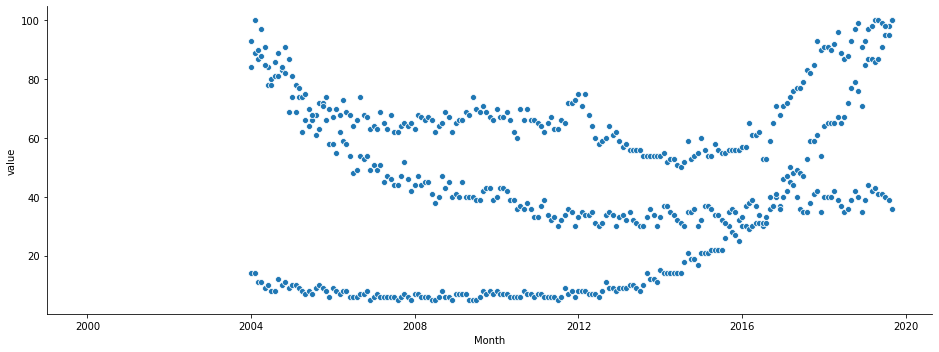

In [193]:
g = sns.relplot(x="Month", y="value", data=melted_dfs)
g.fig.set_figwidth(15)

# EXERCISE

*Clean up this scatterplot!*

- We should have separate **line** plots for each of our original search terms
- There should be a distinctive **hue** and/or **style** for every search term

**HINTS:**
- use `Shift+Tab` or `sns.replot?` to explore the inputs to the function
- This should be a LOT more intuitive than `matplotlib`

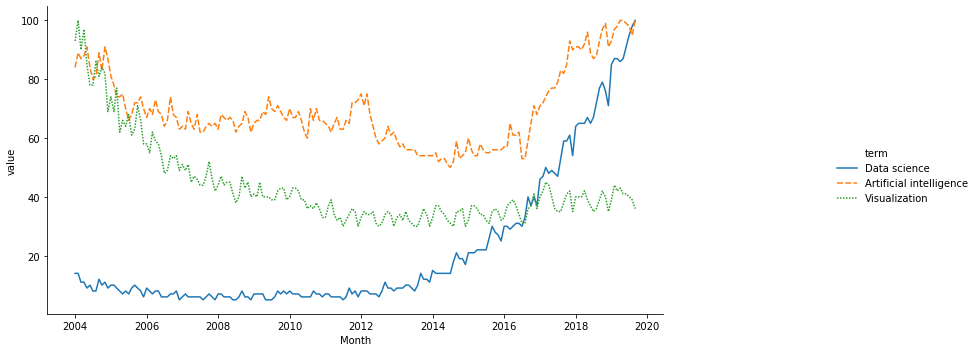

In [194]:
# Solution
g = sns.relplot(x="Month", y="value", data=melted_dfs, hue="term", style="term", kind="line")
g.fig.set_figwidth(15)

In [ ]:
# Your Solution

# EXERCISE

*Hrm ... but I really liked when we broke out each search term into it's own subplot*

- Divide the search term data to have only **1 term per column**

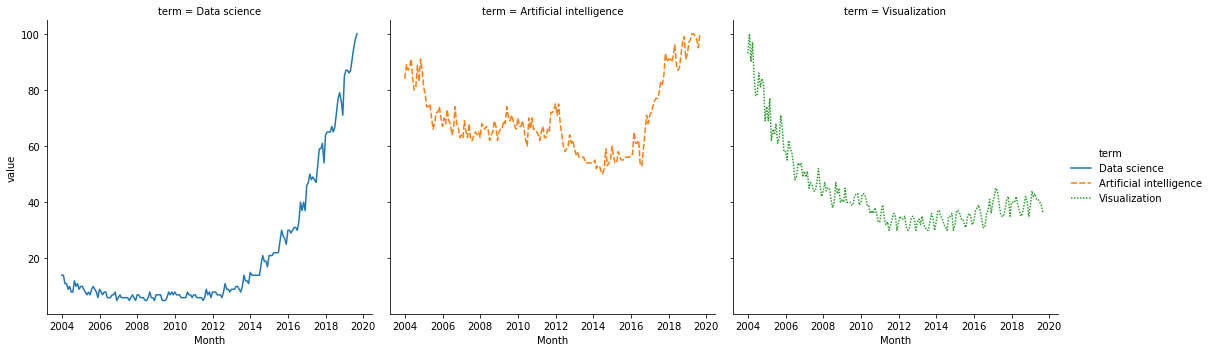

In [161]:
# Solution
sns.relplot(x="Month", y="value", data=melted_dfs, hue="term", style="term", kind="line", col="term");

In [ ]:
# Your Solution

# Distribution Plots
https://seaborn.pydata.org/api.html#distribution-plots

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This is often a great jumping-off point for analysis and sets the tone for what's next.

There are three high-level kinds in this category: `distplot` (for single variables) and `jointplot` and `pairplot` (for two variables). There are also other low-level plot types which you can find in the API guide and definitely worth a look.

## Single Variable Distributions

Let's take a look at `distplot()`, which will cover everything *histogram-like*

- Try different # of bins
- Do we like *rug?*
- Is vertical confusing?
- What's KDE?

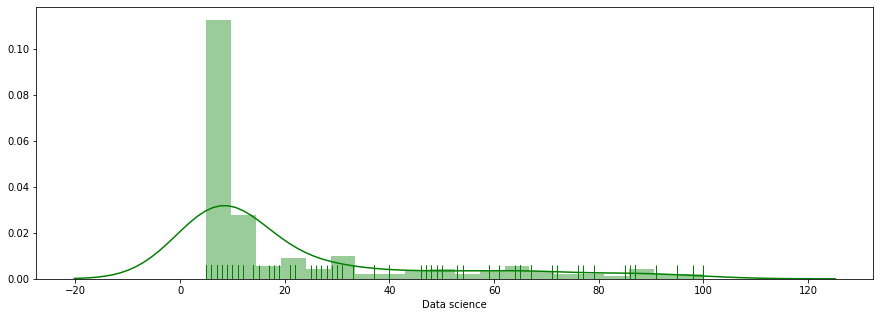

In [46]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(dfs['Data science'], rug=True, color="g", bins = 20, ax=ax);

## Jointplot

Plot two variables in the usual bivariate way, with projections onto univariate graphs on the sides. All of the information is already contained in the bivariate graph, but is made much clearer when sliced out.

- This function is a lightweight wrapper of JointGrid (a more customizable grid for mapping datasets onto). 
- There are a few canned plot kinds to get you started. Let's play with them.

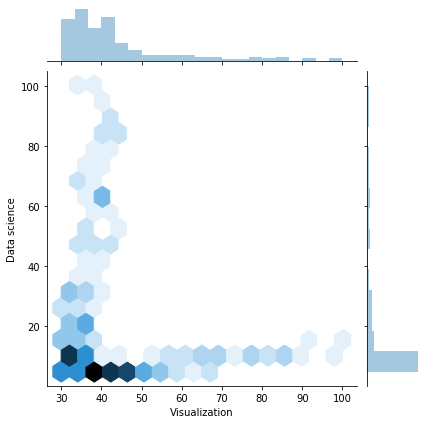

In [49]:
g = sns.jointplot(x="Visualization",y="Data science", data=dfs, kind="hex")

# Pairplot

Pairplot will take each variable in your data (column) and break it out into rows and columns in the plot. This allows you to visualize each pair of relationships (including with itself)

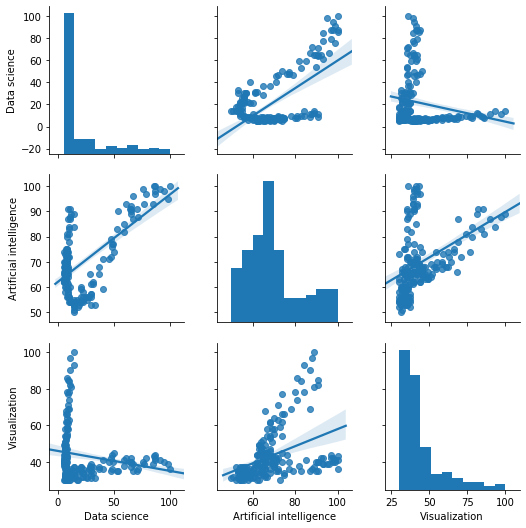

In [53]:
sns.pairplot(dfs, kind="reg");

# Categorical Plots

With relational and distribution plots we focussed on relationships in our data between numerical values. If instead we want to consider data which is categorical (can be divided into discrete groups), we need another approach.

**NOTE** we are using the melted dataset now, since that breaks our data into categories by search term

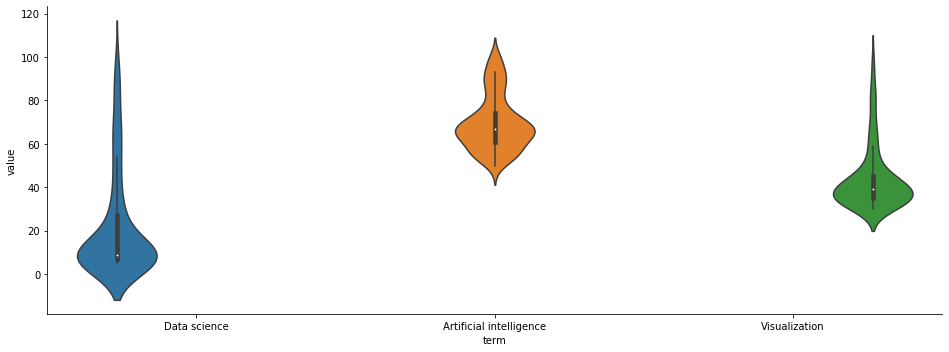

In [56]:
g = sns.catplot(x="term", y="value", kind="violin", hue="term", data=melted_dfs)
g.fig.set_figwidth(15)

# FacetGrid

A custom map over the data.

- Breaks data out by fields into rows and columns
- Different slices and views for each combination of fields
- Effective way to reduce dimensionality for pairwise comparisons
- Allows custom function mapping to create more complex/unique grid views

# A New Dataset

Let's take a look at **global temperatures** and how they change over time.

In [4]:
temperatures = pd.read_csv("../data/global_temperatures/GlobalLandTemperaturesByCountry.csv", parse_dates=['dt'])
continents = pd.read_csv("../data/continents.csv")
temperatures = temperatures.merge(continents)
recent = temperatures[temperatures.dt > '2000']
recent.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Code,Continent_Year,Continent
101481,2004-03-01,27.284,0.350,Costa Rica,CRI,2015,North America
477683,2006-05-01,18.700,0.392,Zimbabwe,ZWE,2015,Africa
469389,2007-03-01,23.782,0.268,Vietnam,VNM,2015,Asia
263957,2006-01-01,25.831,0.465,Madagascar,MDG,2015,Africa
117037,2007-01-01,25.011,0.718,Djibouti,DJI,2015,Africa


# EXERCISE

Use what we've learned so far in Seaborn to analyze a new dataset:

- Create a lineplot to visualize how global temperatures have changed by continent in recent years
- What takeaways are there about this?

c:\users\duranl4\.virtualenvs\visualization-seminar-qrgs2xap\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


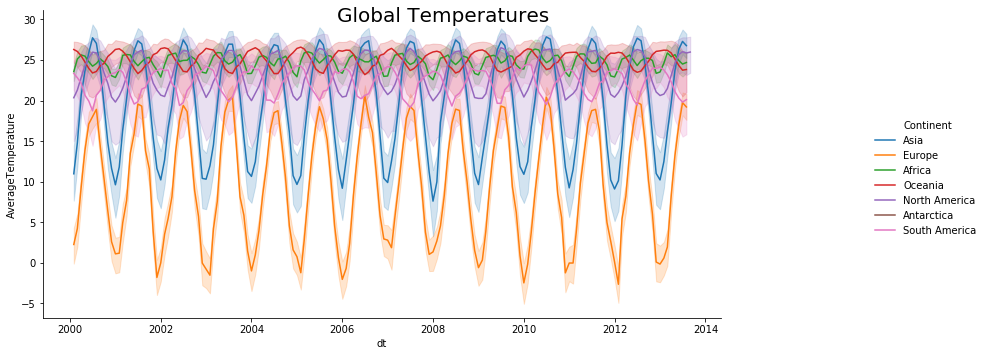

In [5]:
g = sns.relplot(data=recent, x='dt', y='AverageTemperature', hue="Continent", kind="line")
g.fig.suptitle("Global Temperatures", fontsize=20);
g.fig.set_figwidth(15)

# Annotation

We skipped over this in the `matplotlib` section to keep things moving, but let's loop back now. Annotation can include both *regular* text, or *TeX*-style renderings (great for mathematical equations). Let's focus on the regular text.

As with most of these large visualization libraries, check out the docs when you get stuck: https://matplotlib.org/3.1.1/tutorials/text/annotations.html

## Quick Annotation

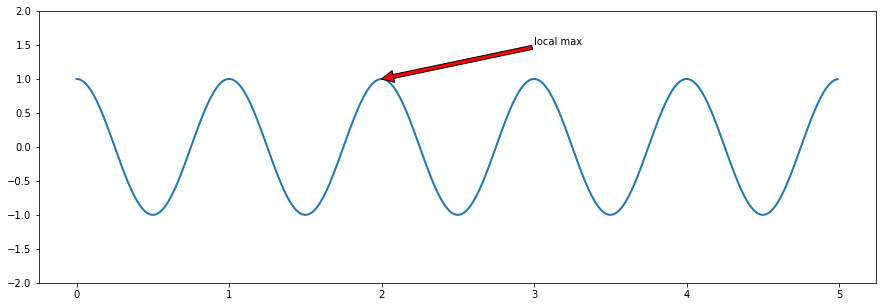

In [125]:
fig, ax = plt.subplots(figsize=(15,5))

t = pd.np.arange(0.0, 5.0, 0.01)
s = pd.np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='red'),
            )
ax.set_ylim(-2, 2);

# EXERCISE

- Change the annotation arrow outline to have a red color
- Try and figure this out from the docs: https://matplotlib.org/3.1.1/tutorials/text/annotations.html

- *HINT:* it must be related to `facecolor`, right?

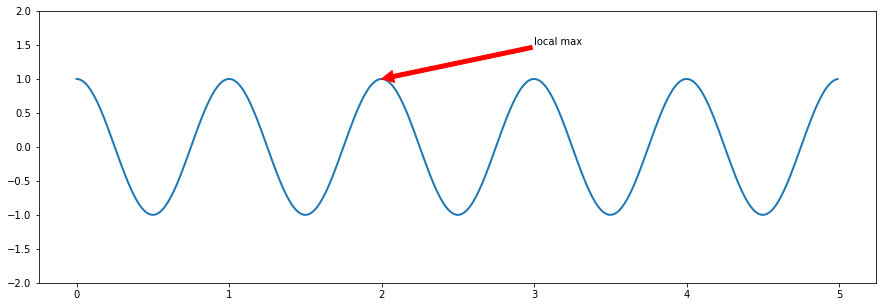

In [195]:
# Solution

fig, ax = plt.subplots(figsize=(15,5))

t = pd.np.arange(0.0, 5.0, 0.01)
s = pd.np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='red', edgecolor='red'),
            )
ax.set_ylim(-2, 2);

In [124]:
# Your Solution

fig, ax = plt.subplots(figsize=(15,5))

t = pd.np.arange(0.0, 5.0, 0.01)
s = pd.np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='red'),
            )
ax.set_ylim(-2, 2);

# EXERCISE

- Create a violin plot to analyse the "normal climate" of each continent
- Add annotations to the plot to explain your findings

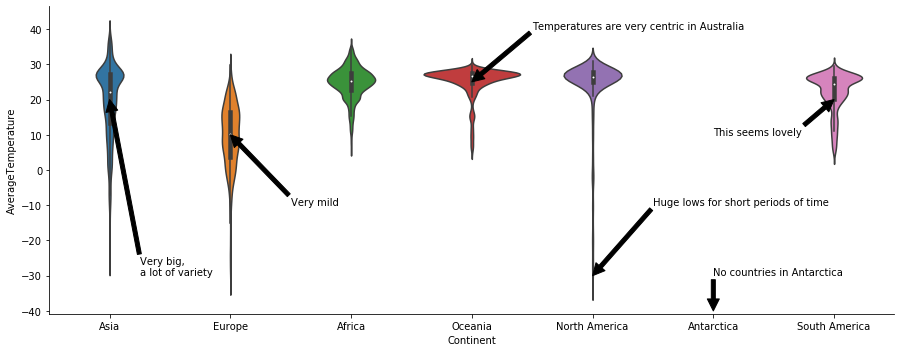

In [24]:
# Solution
g = sns.catplot(x="Continent", y="AverageTemperature", kind="violin", data=recent)
g.fig.set_figwidth(15)
g.ax.annotate("Temperatures are very centric in Australia",
            xy = (3,25),
            xytext = (3.5,40),
           arrowprops=dict(
               facecolor="black"
           ));
g.ax.annotate("Huge lows for short periods of time",
            xy = (4,-30),
            xytext = (4.5,-10),
           arrowprops=dict(
               facecolor="black"
           ));
g.ax.annotate("This seems lovely",
            xy = (6,20),
            xytext = (5,10),
           arrowprops=dict(
               facecolor="black"
           ));
g.ax.annotate("No countries in Antarctica",
            xy = (5,-40),
            xytext = (5,-30),
           arrowprops=dict(
               facecolor="black"
           ));
g.ax.annotate("Very mild",
            xy = (1,10),
            xytext = (1.5,-10),
           arrowprops=dict(
               facecolor="black"
           ));
g.ax.annotate("Very big, \na lot of variety",
            xy = (0,20),
            xytext = (0.25,-30),
           arrowprops=dict(
               facecolor="black"
           ));

In [ ]:
# Your Solution

# Heatmaps

The heatmap is a useful way of representing 3-dimensional data in 2-dimensional form. Like many of our approaches here, we are aiming to **reduce dimensionality** in order to **gain understanding.** The data values are represented as colors in the graph.

- To do this in `seaborn` we need our data in a pivoted format 

# EXERCISE

- Engineer new features for the dataset: `month`, `year` (and you may need `month_number`)
- Pivot the dataframe to track `AverageTemperature` by Year and Month
- Show the results in a heatmap, using `sns.heatmap(pivot)`

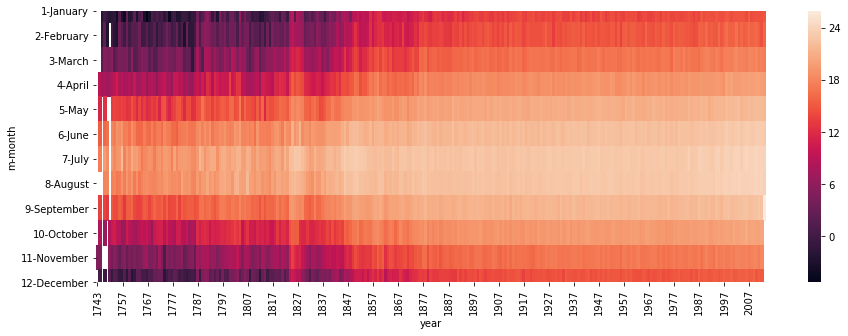

In [69]:
temperatures['month'] = temperatures.dt.dt.month_name() # extract month from date
temperatures['m'] = temperatures.dt.dt.month # extract month from date
temperatures['year'] = temperatures.dt.dt.year # extract year from date

pivot = temperatures.pivot_table(index=["m","month"],columns="year",values="AverageTemperature", aggfunc="mean")
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot, ax = ax, xticklabels=10);

## Did this help?

- What takeaways are there from this view?
- Anything surprising?

# Colour Palettes

One last thing on seaborn before we move on. So far we have been using the default colour palettes for all of our plots (and they look pretty good!). But working with temperature data is a perfect excuse to choose something a little more striking.

Seaborn provides an `ipywidget` for picking your palette. Let's pick something fun.

# EXERCISE

- Choose a new `cmap` colour palette and re-plot the heatmap
- Have a good reason for your choice!

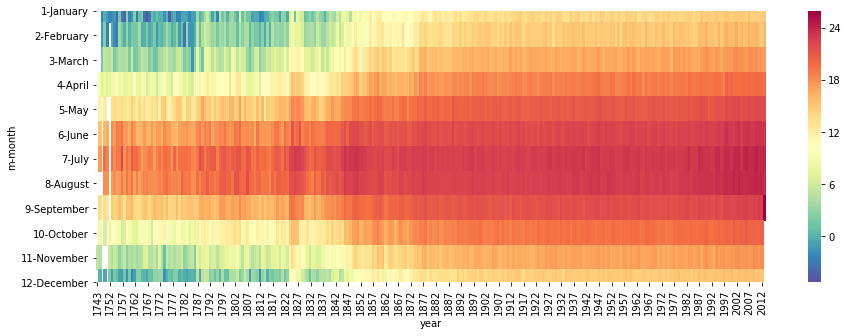

In [266]:
# Solution
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot, ax = ax, cmap="Spectral_r");

In [ ]:
# Your Solution
palette = sns.choose_colorbrewer_palette('diverging', as_cmap=True);